# Creating your own dataset from Google Images

Create an image dataset for each of the categories needed.

In [1]:
from fastai.vision import *

## Get list of URLs
* Google Images
* Search class name (specific)

## Download into file
* `Ctrl + Shift + J`
* `urls = Array.from(document.querySelectorAll('.rg_di.rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));`

## Create directory and upload urls file into your server
Choose name for your labeled images. RUn these steps multiple times to create different labels.

In [11]:
folder = 'baboon'
file = 'urls_baboon.txt'

In [15]:
folder = 'gorilla'
file = 'urls_gorilla.txt'

In [18]:
folder = 'chimpz'
file = 'urls_chimpz.txt'

Run this cell once per category.

In [2]:
path = Path('data/primates')

In [ ]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[WindowsPath('data/primates/baboon'),
 WindowsPath('data/primates/chimpz'),
 WindowsPath('data/primates/gorilla'),
 WindowsPath('data/primates/urls_baboon.txt'),
 WindowsPath('data/primates/urls_chimpz.txt'),
 WindowsPath('data/primates/urls_gorilla.txt')]

## Download images

Run this line once for every category.

In [4]:
classes = ['baboon', 'gorilla', 'chimpz']

In [20]:
download_images(path/file, dest, max_pics=200)

Remove images that cannot be opened.

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [6]:
np.random.seed(51)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (437 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baboon,baboon,baboon,baboon,baboon
Path: data\primates;

Valid: LabelList (109 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gorilla,baboon,gorilla,chimpz,baboon
Path: data\primates;

Test: None

In [7]:
data.classes

['baboon', 'chimpz', 'gorilla']

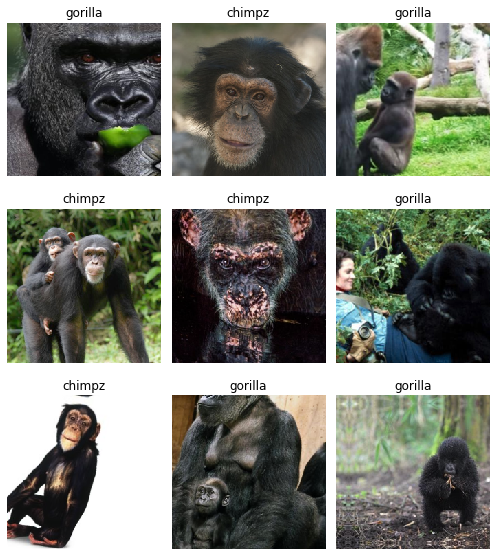

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baboon', 'chimpz', 'gorilla'], 3, 437, 109)

## Train the model

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.226169,0.222397,0.045872,00:28
1,0.173147,0.192481,0.091743,00:29
2,0.184906,0.311503,0.064220,00:28
3,0.176003,0.235812,0.082569,00:28
4,0.176301,0.133186,0.045872,00:28
5,0.165962,0.114109,0.036697,00:28
6,0.159196,0.120248,0.036697,00:28
7,0.162369,0.111981,0.045872,00:28


In [13]:
learn.save('stage-1')

In [45]:
learn.load('stage-1');

In [14]:
learn.unfreeze()

In [21]:
learn.lr_find(start_lr=1e-8, end_lr=1e-7)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


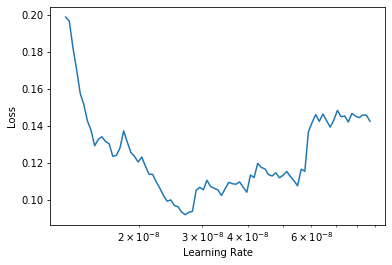

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(2.5e-8,2.8e-8))

epoch,train_loss,valid_loss,error_rate,time
0,0.130803,0.126863,0.036697,00:32
1,0.089851,0.118425,0.036697,00:32


In [24]:
learn.save('stage-2')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

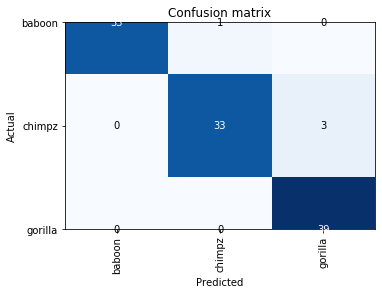

In [26]:
interp.plot_confusion_matrix()

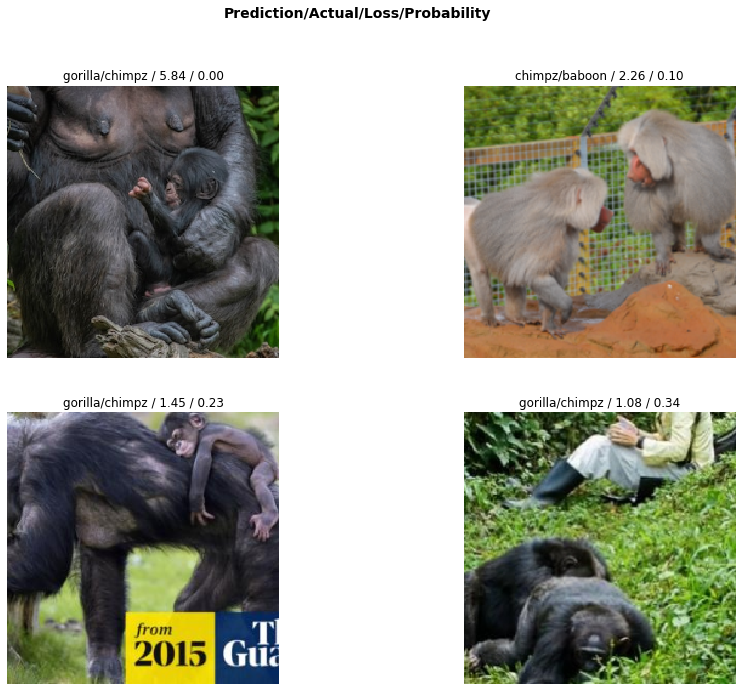

In [28]:
interp.plot_top_losses(4, figsize=(15,11))

## Cleaning Up
Using ImageCleaner widget from fastai.widget to prune top losses, removing photos that don't belong.

In [82]:
from fastai.widgets import *